In [1]:
%load_ext autoreload

In [2]:
import os
os.sys.path.append(os.path.join(os.path.abspath('.'), '..'))

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16

import numpy as np
from scipy.spatial import Delaunay


In [4]:
from trainer.preprocess import PreprocessBatch

In [5]:
case_name = 'Rc_1.0_h_20.2_tac_10.0_tel_6.0'
path_mesh = {case_name: os.path.join('..', 'data', 'raw', 'ex2', 'mesh', case_name + '.mesh')}
path_vtu = {case_name: os.path.join('..', 'data', 'raw', 'ex2', 'vtu', case_name + '.vtu')}

features = ['boundary', 'surface', 'edge']

In [6]:
pp = PreprocessBatch(is_train=True, path_output=(os.path.join('.', )), feature_name=features, grid_size=10)

In [7]:
pp.populate(case_name, path_mesh, path_vtu)

reading file: (0) Rc_1.0_h_20.2_tac_10.0_tel_6.0


In [8]:
pp.compile(do_standardize=False)

[INFO] encoding geometry ...


100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]


[INFO] interpolating features ...


100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.23it/s]


[INFO] interpolating solutions ...


100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.46it/s]


In [24]:
boundary_idx = [idx for idx in range(0, 10)]
surface_idx = [idx for idx in range(10, 13)]
edge_idx = [idx for idx in range(13, 23)]

In [15]:
len(boundary_idx), pp.x_mesh[case_name].shape, pp.x.shape

(10, (5582, 23), (1, 512, 64, 23))

In [16]:
def make_mesh(mesh_data):
    mesh = Delaunay(mesh_data['coord'])
    mesh.simplices = np.array(mesh_data['connect'])

    return mesh

mesh = make_mesh(pp.mesh_data[case_name])
mesh

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib

matplotlib.rc('font', size=20)

C:\Users\farig\Anaconda3\envs\lens3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


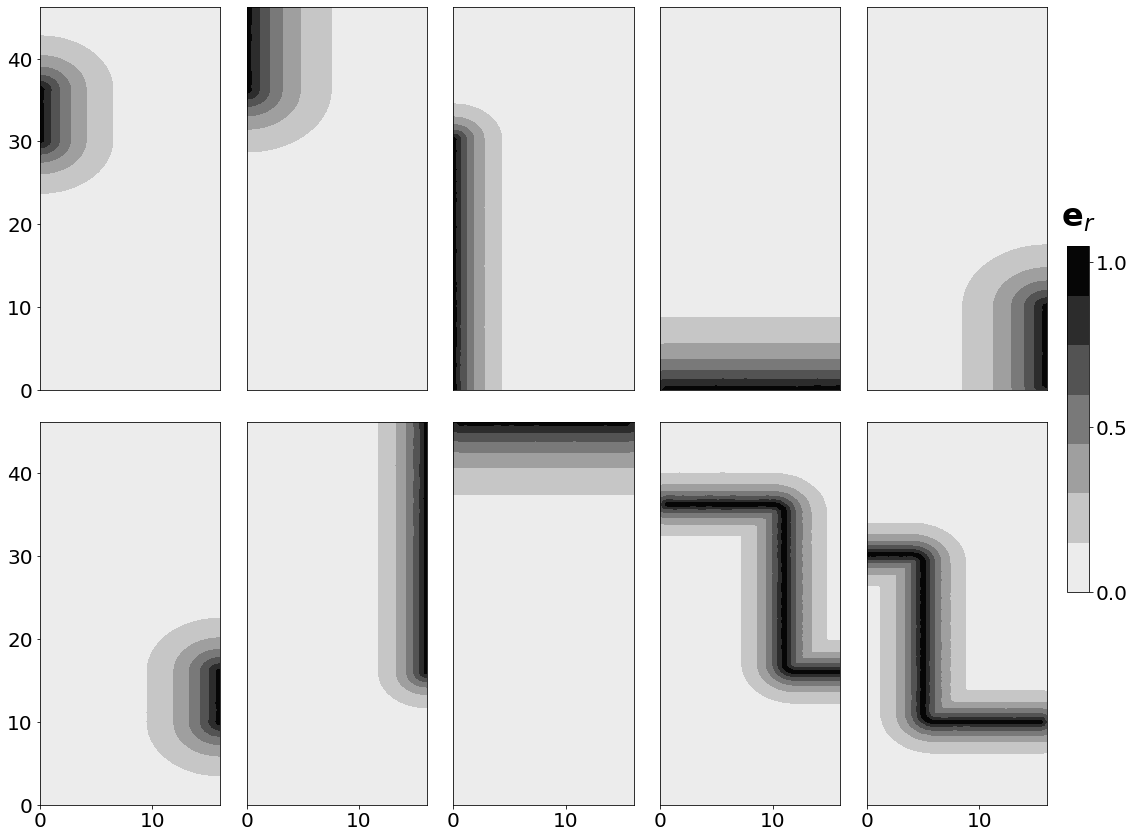

In [21]:
fig, axs = plt.subplots(2, len(boundary_idx)//2, figsize=(15, 12))
axs = [j for i in axs for j in i]

for idx, ax in enumerate(axs):
    field = pp.x_mesh[case_name].iloc[:, idx]
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    im = ax.tricontourf(triangulation, field, vmin=0, vmax=1, extent=[0, 16, 0, 46], cmap='gray_r');
    
    # im = ax.imshow(pp.x[0, :, :, idx], extent=[0, 16, 0, 46], vmin=0, vmax=1, cmap='gray_r')
    ax.set_xticks([0, 10])
    
    if (idx == 4) or (idx == 10):
        # divider = make_axes_locatable(ax)
        # cax = divider.append_axes("right", size="10%", pad=0.2)
        cbar_ax = fig.add_axes([1, 0.3, 0.02, 0.4])
        cbar_ax.set_xlabel('$\mathbf{e}_r$', rotation=0, labelpad=20, fontsize=32)
        cbar_ax.xaxis.set_label_position('top') 

        plt.colorbar(im, cax=cbar_ax, ticks=[0, 0.5, 1.0], boundaries=np.linspace(0, 1))
        
 
    if idx in range(5):
        ax.set_xticklabels([])
        ax.set_xticks([])
        
    if (idx in range(1, 5)) or (idx in range(6, 11)):
        ax.set_yticklabels([])
        ax.set_yticks([])
        
plt.tight_layout(pad = 1);

(5582,) (5582, 2)
(5582,) (5582, 2)
(5582,) (5582, 2)


C:\Users\farig\Anaconda3\envs\lens3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


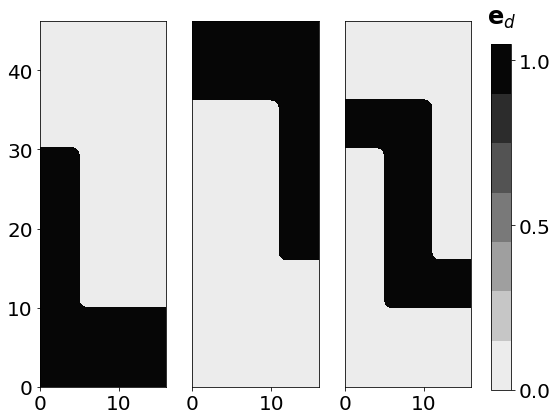

In [27]:
fig, axs = plt.subplots(1, len(surface_idx), figsize=(7, 6))

for idx, ax in enumerate(axs):
    field = pp.x_mesh[case_name].iloc[:, surface_idx[idx]]
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    print(field.shape, mesh.points.shape)
    im = ax.tricontourf(triangulation, field, vmin=0, vmax=1, extent=[0, 16, 0, 46], cmap='gray_r');
    
    # im = ax.imshow(pp.x[0, :, :, surface_idx[idx]], extent=[0, 16, 0, 46], vmin=0, vmax=1, cmap='gray_r')
    ax.set_xticks([0, 10])
    
    if idx == 2:
        # divider = make_axes_locatable(ax)
        # cax = divider.append_axes("right", size="10%", pad=0.2)
        cbar_ax = fig.add_axes([1, 0.1, 0.04, 0.8])
        cbar_ax.set_xlabel('$\mathbf{e}_d$', rotation=0, labelpad=20, fontsize=24)
        cbar_ax.xaxis.set_label_position('top') 
        
        plt.colorbar(im, cax=cbar_ax, ticks=[0, 0.5, 1.0], boundaries=np.linspace(0, 1))
        
    if (idx == 1) or (idx == 2):
        ax.set_yticklabels([])
        ax.set_yticks([])
        
plt.tight_layout(pad=1);

C:\Users\farig\Anaconda3\envs\lens3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


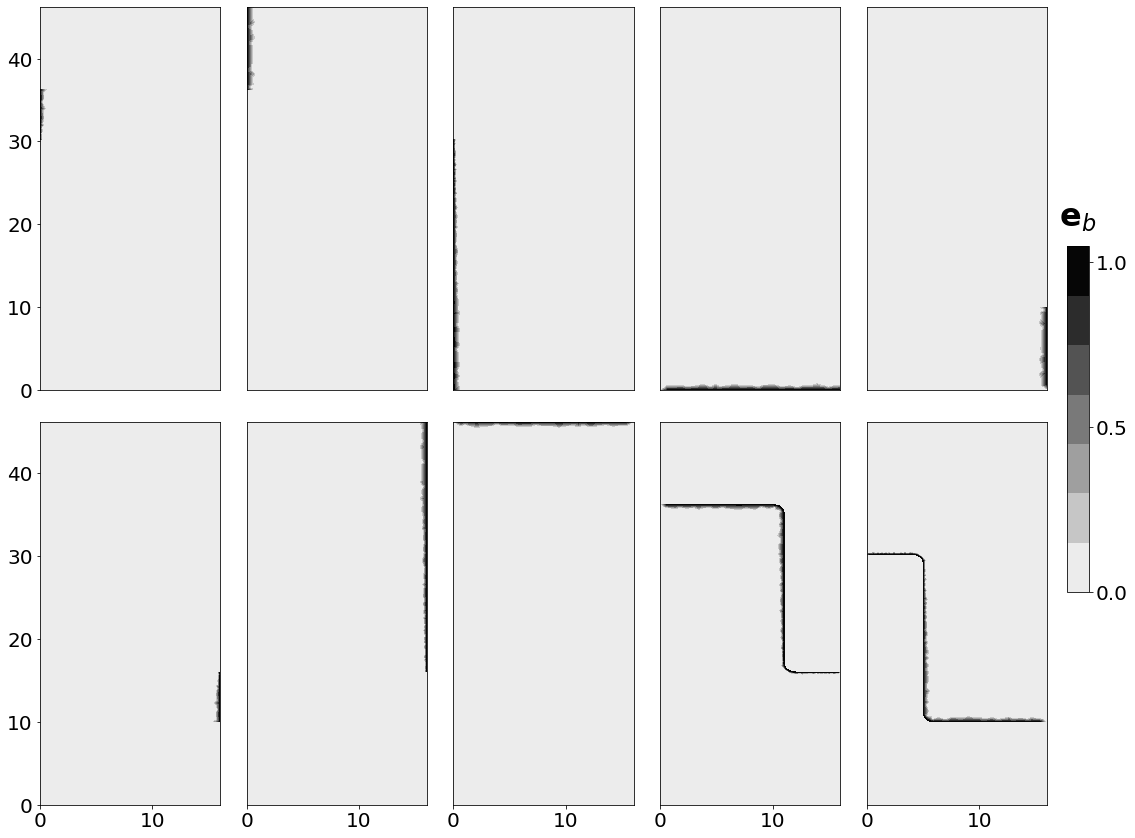

In [26]:
fig, axs = plt.subplots(2, len(edge_idx)//2, figsize=(15, 12))
axs = [j for i in axs for j in i]

for idx, ax in enumerate(axs):
    field = pp.x_mesh[case_name].iloc[:, edge_idx[idx]]
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    im = ax.tricontourf(triangulation, field, vmin=0, vmax=1, extent=[0, 16, 0, 46], cmap='gray_r');
    
    # im = ax.imshow(pp.x[0, :, :, edge_idx[idx]], extent=[0, 16, 0, 46], cmap='gray_r', vmin=0, vmax=1)
    
    if (idx == 5) or (idx == 11):
        divider = make_axes_locatable(ax)
        # cax = divider.append_axes("right", size="10%", pad=0.2)
        cbar_ax = fig.add_axes([1, 0.3, 0.02, 0.4])
        cbar_ax.set_xlabel('$\mathbf{e}_b$', rotation=0, labelpad=20, fontsize=32)
        cbar_ax.xaxis.set_label_position('top') 
        
        plt.colorbar(im, cax=cbar_ax, ticks=[0, 0.5, 1.0], boundaries=np.linspace(0, 1))
        
    if idx in range(5):
        ax.set_xticklabels([])
        ax.set_xticks([])
        
    if (idx in range(1, 5)) or (idx in range(6, 11)):
        ax.set_yticklabels([])
        ax.set_yticks([])
        
plt.tight_layout(pad=1);

# solutions

In [14]:
import matplotlib

In [15]:
def make_mesh(vtu):
    mesh = Delaunay(vtu['coord'])
    mesh.simplices = vtu['connect']
    
    return mesh

mesh = make_mesh(pp.vtu_data[case_name])

In [15]:
x_grid = pp.grid['grid'][:, 0].reshape(*pp.grid['dim'])
y_grid = pp.grid['grid'][:, 1].reshape(*pp.grid['dim'])

In [20]:
def plot_mesh_value(mesh, values_nodes, ax, vmin, vmax, levels=100, cmap='seismic'):
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    ax_cont = ax.tricontourf(triangulation, values_nodes, extent=[0, 16, 0, 46], origin='image', 
                             vmin=vmin, vmax=vmax, levels=levels, cmap=cmap);
        
    return ax_cont


def plot_mesh(mesh, ax):
    triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)
    ax.triplot(triangulation, color='b', linewidth=.1, alpha=1.0);
    

def plot_grid_value(x_grid, y_grid, grid_values, ax, vmin=None, vmax=None, levels=100, cmap='seismic'):
    ax_cont = ax.contourf(x_grid, y_grid, grid_values, vmin=vmin, vmax=vmax, levels=levels, cmap=cmap)
    # ax.scatter(x_grid, y_grid, color='r', s=10)
    return ax_cont

In [18]:
field_names = ['_'.join(str(c) for c in cs) for cs in pp.vtu_data[case_name]['solutions'].columns]
field_names

['deformations_0',
 'deformations_1',
 'deformations_2',
 'stresses_0',
 'stresses_1',
 'stresses_2',
 'stresses_3',
 'currents_0',
 'currents_1',
 'currents_2',
 'fluxes_0',
 'fluxes_1',
 'fluxes_2']

In [19]:
field_new_names = [
    '$\epsilon_{xx}$',
    '$\epsilon_{yy}$',
    '$\epsilon_{xy}$',
    '$\sigma_{xx}$',
    '$\sigma_{yy}$',
    '$\sigma_{zz}$',
    '$\sigma_{xy}$',
    '$\phi$',
    '$i_x$',
    '$i_y$',
    '$c/c_0$',
    '$h_x~$',
    '$h_y~$',
]

field_map = dict(zip(field_names, field_new_names))
field_map

{'deformations_0': '$\\epsilon_{xx}$',
 'deformations_1': '$\\epsilon_{yy}$',
 'deformations_2': '$\\epsilon_{xy}$',
 'stresses_0': '$\\sigma_{xx}$',
 'stresses_1': '$\\sigma_{yy}$',
 'stresses_2': '$\\sigma_{zz}$',
 'stresses_3': '$\\sigma_{xy}$',
 'currents_0': '$\\phi$',
 'currents_1': '$i_x$',
 'currents_2': '$i_y$',
 'fluxes_0': '$c/c_0$',
 'fluxes_1': '$h_x~$',
 'fluxes_2': '$h_y~$'}

C:\Users\farig\Anaconda3\envs\lens3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


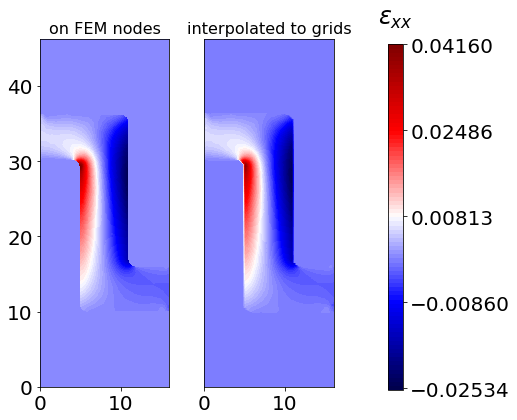

In [21]:
idx = 0

field_name = pp.vtu_data[case_name]['solutions'].columns[idx]
field_name = '_'.join([str(f) for f in field_name])

grid_values = pp.y[0, :, :, idx]
node_values = pp.vtu_data[case_name]['solutions'].iloc[:, idx]

if (field_name == 'fluxes_1') or (field_name == 'fluxes_2'):
    grid_values *= 10000
    node_values *= 10000

vmin = node_values.min()
vmax = node_values.max()

fig, axs = plt.subplots(1,2, figsize=(5.3, 6))

im1 = plot_mesh_value(mesh, node_values, axs[0], vmin=vmin, vmax=vmax, cmap='seismic')
im2 = plot_grid_value(x_grid, y_grid, grid_values, axs[1], vmin=vmin, vmax=vmax, cmap='seismic')

axs[0].set_title('on FEM nodes', fontsize=16)
axs[1].set_title('interpolated to grids', fontsize=16)

axs[1].set_yticks([])
axs[1].set_yticklabels([])

cbar_ax = fig.add_axes([1.05, 0.1, 0.04, 0.8])
cbar_ax.set_xlabel(field_map[field_name], rotation=0, labelpad=20, fontsize=24)
cbar_ax.xaxis.set_label_position('top') 

ticks = [v for v in np.linspace(vmin, vmax, 5)]
    
plt.colorbar(im1, cax=cbar_ax, ticks=ticks)


plt.tight_layout(pad=1)

In [23]:
pp.y.shape

(1, 512, 64, 13)

# compare two size of inputs

In [71]:
case_names = [
    'Rc_1.0_h_21.5_tac_10.0_tel_19.7', 
    'Rc_1.0_h_42.4_tac_10.0_tel_7.0',
    'Rc_1.0_h_58.0_tac_10.0_tel_11.1'
]


path_mesh = {c: os.path.join('..', 'data', 'raw', 'ex2', 'mesh', c + '.mesh') for c in case_names}
path_vtu = {c: os.path.join('..', 'data', 'raw', 'ex2', 'vtu', c + '.vtu') for c in case_names}

features = ['boundary', 'surface', 'edge']

pp = PreprocessBatch(is_train=True, path_output=(os.path.join('.', )), feature_name=features, grid_size=10)

pp.populate(case_names, path_mesh, path_vtu)

pp.compile(do_standardize=False)

reading file: (2) Rc_1.0_h_58.0_tac_10.0_tel_11.1
[INFO] encoding geometry ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.91it/s]


[INFO] interpolating features ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 499.08it/s]


[INFO] interpolating solutions ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 600.19it/s]


In [72]:
pp.x.shape

(3, 512, 64, 27)

In [73]:
pp.mask.shape

(3, 512, 64, 1)

In [74]:
x_grid = pp.grid['grid'][:, 0].reshape(*pp.grid['dim'])
y_grid = pp.grid['grid'][:, 1].reshape(*pp.grid['dim'])

C:\Users\farig\Anaconda3\envs\lens3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


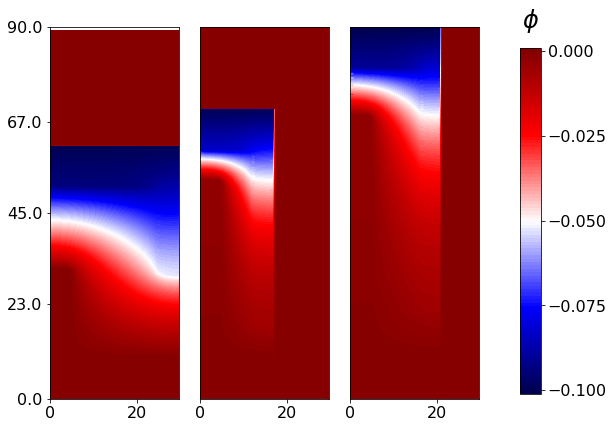

In [107]:
fidx = -6

fig, axs = plt.subplots(1, 3, figsize=(7, 6))

vmin = pp.y[0, :, :, fidx].min()
vmax = pp.y[0, :, :, fidx].max()

im1 = plot_grid_value(x_grid, y_grid, pp.y[0, :, :, fidx], axs[0], cmap='seismic')
im2 = plot_grid_value(x_grid, y_grid, pp.y[1, :, :, fidx], axs[1], cmap='seismic')
im2 = plot_grid_value(x_grid, y_grid, pp.y[2, :, :, fidx], axs[2], cmap='seismic')


axs[0].set_yticklabels([np.ceil(v) for v in np.linspace(0, y_grid.max(), 5)])
axs[0].set_yticks([np.ceil(v) for v in np.linspace(0, y_grid.max(), 5)])

axs[1].set_yticklabels([])
axs[1].set_yticks([])

axs[2].set_yticklabels([])
axs[2].set_yticks([])



cbar_ax = fig.add_axes([1.05, 0.1, 0.04, 0.8])
cbar_ax.set_xlabel('$\\phi$', rotation=0, labelpad=20, fontsize=24)
cbar_ax.xaxis.set_label_position('top')

ticks = [v for v in np.linspace(vmin, vmax, 5)]
    
plt.colorbar(im1, cax=cbar_ax, ticks=ticks)

plt.tight_layout(pad=1)

In [100]:
x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()

(0.0, 29.738405, 0.0, 89.13828)

C:\Users\farig\Anaconda3\envs\lens3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


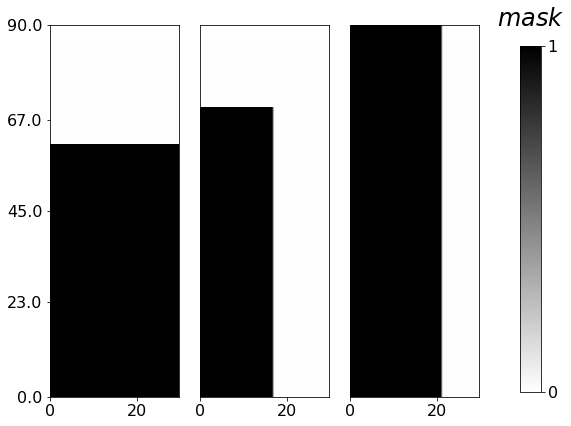

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(7, 6))

im1 = plot_grid_value(x_grid, y_grid, pp.mask[0, :, :, 0].astype(int), axs[0], vmin=0, vmax=1, cmap='gray_r')
im2 = plot_grid_value(x_grid, y_grid, pp.mask[1, :, :, 0].astype(int), axs[1], vmin=0, vmax=1, cmap='gray_r')
im3 = plot_grid_value(x_grid, y_grid, pp.mask[2, :, :, 0].astype(int), axs[2], vmin=0, vmax=1, cmap='gray_r')


axs[0].set_yticklabels([np.ceil(v) for v in np.linspace(0, y_grid.max(), 5)])
axs[0].set_yticks([np.ceil(v) for v in np.linspace(0, y_grid.max(), 5)])

axs[1].set_yticklabels([])
axs[1].set_yticks([])

axs[2].set_yticklabels([])
axs[2].set_yticks([])



cbar_ax = fig.add_axes([1.05, 0.1, 0.04, 0.8])
cbar_ax.set_xlabel('$mask$', rotation=0, labelpad=20, fontsize=24)
cbar_ax.xaxis.set_label_position('top') 

ticks = [0, 1]
    
plt.colorbar(im1, cax=cbar_ax, ticks=ticks)

plt.tight_layout(pad=1)